<a href="https://colab.research.google.com/github/sezaionurlu/AB-TEST/blob/main/AB_Testi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AB Testi ile Bidding Yöntemlerinin
Dönüşümünün Karşılaştırılması

**İş Problemi**

Facebook kısa süre önce mevcut "maximumbidding" adı verilen
teklif verme türüne alternatif olarak yeni bir teklif türü olan
"average bidding"’i tanıttı.
Müşterilerimizden biri olan bombabomba.com, bu yeni özelliği test
etmeye karar verdi ve average bidding'inmaximumbidding'den
daha fazla dönüşüm getirip getirmediğini anlamak için bir A/B
testi yapmak istiyor.
A/B testi 1 aydır devam ediyor ve bombabomba.com şimdi sizden
bu A/B testinin sonuçlarını analiz etmenizi bekliyor.
Bombabomba.com için nihai başarı ölçütü Purchase'dır. Bu
nedenle, istatistiksel testler için Purchase metriğine
odaklanılmalıdır.

**Veri Seti Hikayesi**

Bir firmanın web site bilgilerini içeren bu veri setinde kullanıcıların gördükleri ve tıkladıkları reklam sayıları gibi bilgilerin yanı sıra
buradan gelen kazanç bilgileri yer almaktadır. Kontrol ve Test grubu olmak üzere iki ayrı veri seti vardır. Bu veri setleri
ab_testing.xlsx excel’inin ayrı sayfalarında yer almaktadır. Kontrol grubuna Maximum Bidding, test grubuna Average
Bidding uygulanmıştır.

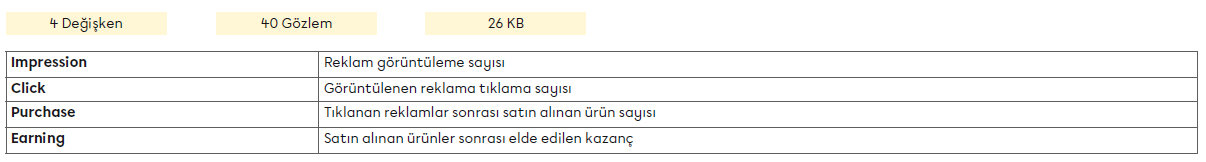

**Proje Görevleri**

In [ ]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install statsmodels
import statsmodels.stats.api as sms
from scipy.stats import ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu, \
    pearsonr, spearmanr, kendalltau, f_oneway, kruskal
from statsmodels.stats.proportion import proportions_ztest

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


*Görev 1: Veriyi Hazırlama ve Analiz Etme*

In [ ]:
# Adım 1: ab_testing_data.xlsx adlı kontrol ve test grubu verilerinden oluşan veri setini okutunuz. Kontrol ve test grubu verilerini ayrı değişkenlere atayınız.

In [ ]:
df_ = pd.read_excel('/content/drive/MyDrive/Veri Bilimi/Ödevler/4/ab_testing.xlsx',sheet_name='Control Group')

In [ ]:
df_2 = pd.read_excel('/content/drive/MyDrive/Veri Bilimi/Ödevler/4/ab_testing.xlsx',sheet_name='Test Group')

In [ ]:
max_bid = df_.copy()

In [ ]:
ave_bid = df_2.copy()

In [ ]:
# Adım 2: Kontrol ve test grubu verilerini analiz ediniz.

In [ ]:
max_bid.head()

,Impression,Click,Purchase,Earning
0,82529.45927,6090.07732,665.21125,2311.27714
1,98050.45193,3382.86179,315.08489,1742.80686
2,82696.02355,4167.96575,458.08374,1797.82745
3,109914.40040,4910.88224,487.09077,1696.22918
4,108457.76263,5987.65581,441.03405,1543.72018


In [ ]:
max_bid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Impression  40 non-null     float64
 1   Click       40 non-null     float64
 2   Purchase    40 non-null     float64
 3   Earning     40 non-null     float64
dtypes: float64(4)
memory usage: 1.4 KB


In [ ]:
max_bid.describe().T

,count,mean,std,min,25%,50%,75%,max
Impression,40.00000,101711.44907,20302.15786,45475.94296,85726.69035,99790.70108,115212.81654,147539.33633
Click,40.00000,5100.65737,1329.98550,2189.75316,4124.30413,5001.22060,5923.80360,7959.12507
Purchase,40.00000,550.89406,134.10820,267.02894,470.09553,531.20631,637.95709,801.79502
Earning,40.00000,1908.56830,302.91778,1253.98952,1685.84720,1975.16052,2119.80278,2497.29522


In [ ]:
ave_bid.head()

,Impression,Click,Purchase,Earning
0,120103.50380,3216.54796,702.16035,1939.61124
1,134775.94336,3635.08242,834.05429,2929.40582
2,107806.62079,3057.14356,422.93426,2526.24488
3,116445.27553,4650.47391,429.03353,2281.42857
4,145082.51684,5201.38772,749.86044,2781.69752


In [ ]:
ave_bid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Impression  40 non-null     float64
 1   Click       40 non-null     float64
 2   Purchase    40 non-null     float64
 3   Earning     40 non-null     float64
dtypes: float64(4)
memory usage: 1.4 KB


In [ ]:
ave_bid.describe().T

,count,mean,std,min,25%,50%,75%,max
Impression,40.00000,120512.41176,18807.44871,79033.83492,112691.97077,119291.30077,132050.57893,158605.92048
Click,40.00000,3967.54976,923.09507,1836.62986,3376.81902,3931.35980,4660.49791,6019.69508
Purchase,40.00000,582.10610,161.15251,311.62952,444.62683,551.35573,699.86236,889.91046
Earning,40.00000,2514.89073,282.73085,1939.61124,2280.53743,2544.66611,2761.54540,3171.48971


In [ ]:
# Adım 3: Analiz işleminden sonra concat metodunu kullanarak kontrol ve test grubu verilerini birleştiriniz.

In [ ]:
?pd.concat

In [ ]:
df = pd.concat([max_bid, ave_bid], axis=1)

In [ ]:
df.head()

,Impression,Click,Purchase,Earning,Impression,Click,Purchase,Earning
0,82529.45927,6090.07732,665.21125,2311.27714,120103.50380,3216.54796,702.16035,1939.61124
1,98050.45193,3382.86179,315.08489,1742.80686,134775.94336,3635.08242,834.05429,2929.40582
2,82696.02355,4167.96575,458.08374,1797.82745,107806.62079,3057.14356,422.93426,2526.24488
3,109914.40040,4910.88224,487.09077,1696.22918,116445.27553,4650.47391,429.03353,2281.42857
4,108457.76263,5987.65581,441.03405,1543.72018,145082.51684,5201.38772,749.86044,2781.69752


In [ ]:
df.columns.values[[4, 5, 6, 7]] = ['Impression_2', 'Click_2', 'Purchase_2', 'Earning_2']

In [ ]:
df.head()

,Impression,Click,Purchase,Earning,Impression_2,Click_2,Purchase_2,Earning_2
0,82529.45927,6090.07732,665.21125,2311.27714,120103.50380,3216.54796,702.16035,1939.61124
1,98050.45193,3382.86179,315.08489,1742.80686,134775.94336,3635.08242,834.05429,2929.40582
2,82696.02355,4167.96575,458.08374,1797.82745,107806.62079,3057.14356,422.93426,2526.24488
3,109914.40040,4910.88224,487.09077,1696.22918,116445.27553,4650.47391,429.03353,2281.42857
4,108457.76263,5987.65581,441.03405,1543.72018,145082.51684,5201.38772,749.86044,2781.69752


*Görev 2: A/B Testinin Hipotezinin Tanımlanması*

In [ ]:
# Adım 1: Hipotezi tanımlayınız.
# H0 : M1 = M2
# H1 : M1!= M2

In [ ]:
# H0 : Kontrol ve Test gruplarının kazanç ortalamalarında anlamlı bir fark yoktur.

In [ ]:
# Adım 2: Kontrol ve test grubu için purchase (kazanç) ortalamalarını analiz ediniz.

In [ ]:
df[['Purchase', 'Purchase_2']].mean()

Purchase     550.89406
Purchase_2   582.10610
dtype: float64

*Görev 3: Hipotez Testinin Gerçekleştirilmesi*

In [ ]:
# Adım 1: Hipotez testi yapılmadan önce varsayım kontrollerini yapınız.
# Bunlar Normallik Varsayımı ve Varyans Homojenliğidir. Kontrol ve test grubunun normallik varsayımına uyup uymadığını Purchase değişkeni üzerinden ayrı ayrı test ediniz.

# Normallik Varsayımı :
# H0: Normal dağılım varsayımı sağlanmaktadır.
# H1: Normal dağılım varsayımı sağlanmamaktadır.
# p < 0.05 H0 RED , p > 0.05 H0 REDDEDİLEMEZ
# Test sonucuna göre normallik varsayımı kontrol ve test grupları için sağlanıyor mu ? Elde edilen p-value değerlerini yorumlayınız.

# Varyans Homojenliği :
# H0: Varyanslar homojendir.
# H1: Varyanslar homojen Değildir.
# p < 0.05 H0 RED , p > 0.05 H0 REDDEDİLEMEZ
# Kontrol ve test grubu için varyans homojenliğinin sağlanıp sağlanmadığını Purchase değişkeni üzerinden test ediniz.
# Test sonucuna göre normallik varsayımı sağlanıyor mu? Elde edilen p-value değerlerini yorumlayınız.

In [ ]:
test_stat, pvalue = shapiro(df['Purchase'])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.9773, p-value = 0.5891


In [ ]:
test_stat, pvalue = shapiro(df['Purchase_2'])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.9589, p-value = 0.1541


In [ ]:
# p > 0.05 HO REDDEDİLEMEZ. Dağılımlar Normaldir.

In [ ]:
test_stat, pvalue = levene(df['Purchase'],
                           df['Purchase_2'])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 2.6393, p-value = 0.1083


In [ ]:
# p > 0.05 HO REDDEDİLEMEZ. Varyanslar homojendir.

In [ ]:
# Adım 2: Normallik Varsayımı ve Varyans Homojenliği sonuçlarına göre uygun testi seçiniz.

In [ ]:
test_stat, pvalue = ttest_ind(df['Purchase'],
                              df['Purchase_2'],
                              equal_var=True) # Normal dağılım fakat homojen değilse 'False' girilir.

print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = -0.9416, p-value = 0.3493


In [ ]:
# Adım 3: Test sonucunda elde edilen p_value değerini göz önünde bulundurarak kontrol ve test grubu satın alma ortalamaları arasında istatistiki
# olarak anlamlı bir fark olup olmadığını yorumlayınız.

In [ ]:
# p > 0.05 HO REDDEDİLEMEZ. Kontrol ve test grubu satın alma ortalamaları arasında istatistiki olarak anlamlı bir fark yoktur.

*Görev 4: Sonuçların Analizi*

In [ ]:
# Adım 1: Hangi testi kullandınız, sebeplerini belirtiniz.

In [ ]:
# Normal dağılım ve varyans homojenliği testlerine uyduğu için parametrik test olan "bağımsız iki örneklem t testi" ni kullandım.

In [ ]:
# Adım 2: Elde ettiğiniz test sonuçlarına göre müşteriye tavsiyede bulununuz.

In [ ]:
df[['Purchase', 'Purchase_2']].mean()

Purchase     550.89406
Purchase_2   582.10610
dtype: float64

In [ ]:
# İstatiski olarak anlamlı bir fark yoktur fakat, bir tercih yapılacaksa "Average Bidding" metodu kullanılması tavsiye edilir.